In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan = pd.read_csv("G:\\ITVedant\\Python\\ML\\Datasets\\loan.csv",sep=",")

In [3]:
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [4]:
# summarising number of missing values in each column
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [5]:
# removing the columns having more than 90% missing values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [6]:
loan = loan.drop(missing_columns, axis=1)
print(loan.shape)

(39717, 55)


In [7]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [8]:
loan['emp_title'].value_counts()

US Army                                                                           134
Bank of America                                                                   109
IBM                                                                                66
AT&T                                                                               59
Kaiser Permanente                                                                  56
Wells Fargo                                                                        54
USAF                                                                               54
UPS                                                                                53
US Air Force                                                                       52
Walmart                                                                            45
Lockheed Martin                                                                    44
United States Air Force                               

In [9]:
loan["emp_title"].fillna("US Army",inplace=True)

In [10]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [11]:
loan['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [12]:
loan['emp_length'].fillna('10+ years',inplace=True)

In [13]:
loan.isnull().sum()*100/loan.shape[0]

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.000000
emp_length                     0.000000
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [14]:
loan.drop("desc",axis = 1,inplace=True)

In [15]:
loan.isnull().sum()*100/loan.shape[0]

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.000000
emp_length                     0.000000
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000


In [16]:
loan.drop("mths_since_last_delinq",axis =1,inplace=True)

In [17]:
loan.isnull().sum()*100/loan.shape[0]

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.000000
emp_length                    0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [18]:
loan['title'].value_counts()

Debt Consolidation                                                                  2184
Debt Consolidation Loan                                                             1729
Personal Loan                                                                        659
Consolidation                                                                        517
debt consolidation                                                                   505
Home Improvement                                                                     356
Credit Card Consolidation                                                            356
Debt consolidation                                                                   334
Small Business Loan                                                                  328
Credit Card Loan                                                                     317
Personal                                                                             308
Consolidation Loan   

In [19]:
loan['title'].fillna("Debt Consolidation", inplace=True)

In [20]:
loan['title'].value_counts()

Debt Consolidation                                                                  2195
Debt Consolidation Loan                                                             1729
Personal Loan                                                                        659
Consolidation                                                                        517
debt consolidation                                                                   505
Home Improvement                                                                     356
Credit Card Consolidation                                                            356
Debt consolidation                                                                   334
Small Business Loan                                                                  328
Credit Card Loan                                                                     317
Personal                                                                             308
Consolidation Loan   

In [21]:
loan["last_pymnt_d"].fillna("May-16",inplace=True)

In [22]:
loan['last_credit_pull_d'].fillna("May-16",inplace=True)

In [23]:
loan["collections_12_mths_ex_med"].fillna(0.0,inplace=True)

In [24]:
loan['chargeoff_within_12_mths'].fillna(0.0,inplace=True)

In [25]:
m = loan["pub_rec_bankruptcies"].mean()
loan['pub_rec_bankruptcies'].fillna(m,inplace=True)

In [26]:
loan['tax_liens'].fillna(0.0,inplace=True)

In [27]:
loan.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util

In [28]:
#to remove % sign from right in int_rate colum
loan['revol_util'] = loan['revol_util'].astype(str).str.replace('%', '')

In [29]:
loan['revol_util'].astype('float64')

0        83.70
1         9.40
2        98.50
3        21.00
4        53.90
5        28.30
6        85.60
7        87.50
8        32.60
9        36.50
10       20.60
11       67.10
12       91.70
13       43.10
14       55.50
15       81.50
16       70.20
17       16.00
18       37.73
19       23.10
20       85.60
21       90.30
22       82.40
23       91.80
24       29.70
25       93.90
26       57.60
27       59.50
28       37.70
29       59.10
30       86.90
31       27.40
32       63.60
33       29.30
34       60.50
35       57.20
36       13.30
37       50.40
38       66.50
39       50.00
40       18.10
41       21.00
42       98.10
43       99.00
44       32.50
45       13.40
46       62.10
47       52.30
48       19.50
49       36.40
50       63.70
51       62.00
52       92.90
53       90.80
54       52.10
55       97.60
56       75.10
57       72.70
58       59.10
59       91.20
60       58.90
61       58.90
62       57.40
63       66.90
64       30.10
65       45.90
66       7

In [30]:
loan['revol_util']=loan['revol_util'].astype('float64')

In [31]:
loan['revol_util'].dtypes

dtype('float64')

In [32]:
loan['revol_util'].mean()

48.83215241888721

In [33]:
m = loan['revol_util'].median()
loan['revol_util'].fillna(m,inplace=True)

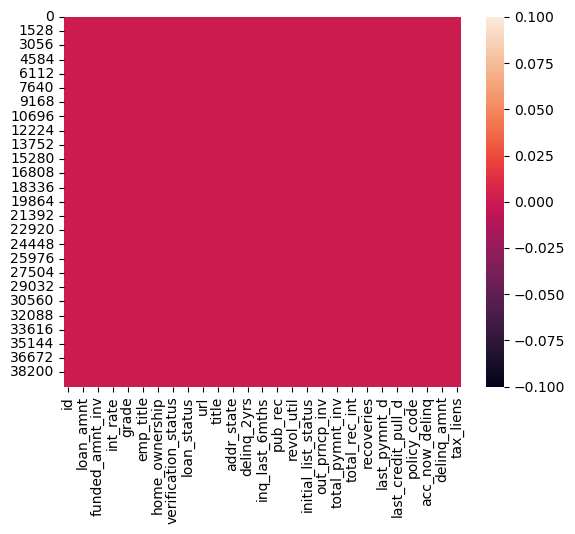

In [34]:
sns.heatmap(data=loan.isnull())
plt.show()

In [35]:
loan.duplicated().sum()

0

In [36]:
loan.drop('url',axis = 1,inplace = True)

In [37]:
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                   US Army  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                   US Army  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan         purpose                 title zip_code addr_state    dti  \
0          n     credit_card              Computer    860xx         AZ  27.65   
1          n             car                  bike    309xx         GA   1.00   
2          n  small_business  real estate business    606xx         IL   8.72   
3          n           other              personel    917xx         CA  20.00   
4          n           other              Personal    972xx         OR  17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0            0           Jan-85               1         3        0      13648   
1            0           Apr-99               5         3        0       1687   
2            0           Nov-01               2         2        0       2956   
3            0           Feb-96               1        10        0       5598   
4            0           Jan-96               0        15        0      27783   

   revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
0        83.7          9                   f       0.00           0.00   
1         9.4          4                   f       0.00           0.00   
2        98.5         10                   f       0.00           0.00   
3        21.0         37                   f       0.00           0.00   
4        53.9         38                   f     524.06         524.06   

    total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0   5863.155187          5833.84          5000.00         863.16   
1   1008.710000          1008.71           456.46         435.17   
2   3005.666844          3005.67          2400.00         605.67   
3  12231.890000         12231.89         10000.00        2214.92   
4   3513.330000          3513.33          2475.94        1037.39   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00        0.00                     0.00       Jan-15   
1                0.00      117.08                     1.11       Apr-13   
2                0.00        0.00                     0.00       Jun-14   
3               16.97        0.00                     0.00       Jan-15   
4                0.00        0.00                     0.00       May-16   

   last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  \
0           171.62             May-16                         0.0   
1           119.66             Sep-13                         0.0   
2           649.91             May-16                         0.0   
3           357.48             Apr-16                         0.

### Cleaning process is been done 

In [38]:
loan_cat = loan.select_dtypes(object)

In [39]:
loan_cat.head()

term int_rate grade sub_grade                 emp_title emp_length  \
0   36 months   10.65%     B        B2                   US Army  10+ years   
1   60 months   15.27%     C        C4                     Ryder   < 1 year   
2   36 months   15.96%     C        C5                   US Army  10+ years   
3   36 months   13.49%     C        C1       AIR RESOURCES BOARD  10+ years   
4   60 months   12.69%     B        B5  University Medical Group     1 year   

  home_ownership verification_status issue_d  loan_status pymnt_plan  \
0           RENT            Verified  Dec-11   Fully Paid          n   
1           RENT     Source Verified  Dec-11  Charged Off          n   
2           RENT        Not Verified  Dec-11   Fully Paid          n   
3           RENT     Source Verified  Dec-11   Fully Paid          n   
4           RENT     Source Verified  Dec-11      Current          n   

          purpose                 title zip_code addr_state earliest_cr_line  \
0     credit_card              Computer    860xx         AZ           Jan-85   
1             car                  bike    309xx         GA           Apr-99   
2  small_business  real estate business    606xx         IL           Nov-01   
3           other              personel    917xx         CA           Feb-96   
4           other              Personal    972xx         OR           Jan-96   

  initial_list_status last_pymnt_d last_credit_pull_d application_type  
0                   f       Jan-15             May-16       INDIVIDUAL  
1                   f       Apr-13             Sep-13       INDIVIDUAL  
2                   f       Jun-14             May-16       INDIVIDUAL  
3                   f       Jan-15             Apr-16       INDIVIDUAL  
4                   f       May-16             May-16       INDIVIDUAL

In [40]:
loan_num = loan.select_dtypes(['int64','float64'])

In [41]:
loan_num.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  installment  \
0  1077501    1296599       5000         5000           4975.0       162.87   
1  1077430    1314167       2500         2500           2500.0        59.83   
2  1077175    1313524       2400         2400           2400.0        84.33   
3  1076863    1277178      10000        10000          10000.0       339.31   
4  1075358    1311748       3000         3000           3000.0        67.79   

   annual_inc    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  \
0     24000.0  27.65            0               1         3        0   
1     30000.0   1.00            0               5         3        0   
2     12252.0   8.72            0               2         2        0   
3     49200.0  20.00            0               1        10        0   
4     80000.0  17.94            0               0        15        0   

   revol_bal  revol_util  total_acc  out_prncp  out_prncp_inv   total_pymnt  \
0      13648        83.7          9       0.00           0.00   5863.155187   
1       1687         9.4          4       0.00           0.00   1008.710000   
2       2956        98.5         10       0.00           0.00   3005.666844   
3       5598        21.0         37       0.00           0.00  12231.890000   
4      27783        53.9         38     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1008.71           456.46         435.17                0.00   
2          3005.67          2400.00         605.67                0.00   
3         12231.89         10000.00        2214.92               16.97   
4          3513.33          2475.94        1037.39                0.00   

   recoveries  collection_recovery_fee  last_pymnt_amnt  \
0        0.00                     0.00           171.62   
1      117.08                     1.11           119.66   
2        0.00                     0.00           649.91   
3        0.00                     0.00           357.48   
4        0.00                     0.00            67.79   

   collections_12_mths_ex_med  policy_code  acc_now_delinq  \
0                         0.0            1               0   
1                         0.0            1               0   
2                         0.0            1               0   
3                         0.0            1               0   
4                         0.0            1               0   

   chargeoff_within_12_mths  delinq_amnt  pub_rec_bankruptcies  tax_liens  
0                       0.0            0                   0.0        0.0  
1                       0.0            0                   0.0        0.0  
2                       0.0            0                   0.0        0.0  
3                       0.0            0                   0.0        0.0  
4                       0.0            0                   0.0        0.0

In [42]:
from sklearn.preprocessing import LabelEncoder
#convert all categorical type data (object type) into number type
for col in loan_cat:
    #print(col)
    #create object of LabelEncoder class
    le=LabelEncoder()
    loan_cat[col]=le.fit_transform(loan_cat[col])

In [43]:
loan_cat.head()

term  int_rate  grade  sub_grade  emp_title  emp_length  home_ownership  \
0     0        17      1          6      23197           1               4   
1     1       158      2         13      18995          10               4   
2     0       175      2         14      23197           1               4   
3     0        99      2         10        331           1               4   
4     1        74      1          9      23683           0               4   

   verification_status  issue_d  loan_status  pymnt_plan  purpose  title  \
0                    2       13            2           0        1   2958   
1                    1       13            0           0        0  16197   
2                    0       13            2           0       11  18885   
3                    1       13            2           0        9  18778   
4                    1       13            1           0        9  12357   

   zip_code  addr_state  earliest_cr_line  initial_list_status  last_pymnt_d  \
0       713           3               200                    0            41   
1       277          10                42                    0             5   
2       502          14               387                    0            57   
3       749           4               169                    0            41   
4       798          36               211                    0            76   

   last_credit_pull_d  application_type  
0                  80                 0  
1                 103                 0  
2                  80                 0  
3                   7                 0  
4                  80                 0

In [44]:
loan_new = pd.concat([loan_cat,loan_num],axis=1)

In [45]:
loan_new.head()

term  int_rate  grade  sub_grade  emp_title  emp_length  home_ownership  \
0     0        17      1          6      23197           1               4   
1     1       158      2         13      18995          10               4   
2     0       175      2         14      23197           1               4   
3     0        99      2         10        331           1               4   
4     1        74      1          9      23683           0               4   

   verification_status  issue_d  loan_status  pymnt_plan  purpose  title  \
0                    2       13            2           0        1   2958   
1                    1       13            0           0        0  16197   
2                    0       13            2           0       11  18885   
3                    1       13            2           0        9  18778   
4                    1       13            1           0        9  12357   

   zip_code  addr_state  earliest_cr_line  initial_list_status  last_pymnt_d  \
0       713           3               200                    0            41   
1       277          10                42                    0             5   
2       502          14               387                    0            57   
3       749           4               169                    0            41   
4       798          36               211                    0            76   

   last_credit_pull_d  application_type       id  member_id  loan_amnt  \
0                  80                 0  1077501    1296599       5000   
1                 103                 0  1077430    1314167       2500   
2                  80                 0  1077175    1313524       2400   
3                   7                 0  1076863    1277178      10000   
4                  80                 0  1075358    1311748       3000   

   funded_amnt  funded_amnt_inv  installment  annual_inc    dti  delinq_2yrs  \
0         5000           4975.0       162.87     24000.0  27.65            0   
1         2500           2500.0        59.83     30000.0   1.00            0   
2         2400           2400.0        84.33     12252.0   8.72            0   
3        10000          10000.0       339.31     49200.0  20.00            0   
4         3000           3000.0        67.79     80000.0  17.94            0   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0               1         3        0      13648        83.7          9   
1               5         3        0       1687         9.4          4   
2               2         2        0       2956        98.5         10   
3               1        10        0       5598        21.0         37   
4               0        15        0      27783        53.9         38   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       0.00           0.00   5863.155187          5833.84          5000.00   
1       0.00           0.00   1008.710000          1008.71           456.46   
2       0.00           0.00   3005.666844          3005.67          2400.00   
3       0.00           0.00  12231.890000         12231.89         10000.00   
4     524.06         524.06   3513.330000          3513.33          2475.94   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
4        1037.39                0.00        0.00                     0.00   

   last_pymnt_amnt  collections_12_mths_ex_med  policy_code  acc_now_delinq  \
0           171.62                         0.0            1               0   
1           119.66                         0.0            1               0   
2           649.91                         0.0    

In [46]:
X = loan_new.drop("loan_status",axis = 1)#input
Y = loan_new["loan_status"]#output

In [47]:
X.head()

term  int_rate  grade  sub_grade  emp_title  emp_length  home_ownership  \
0     0        17      1          6      23197           1               4   
1     1       158      2         13      18995          10               4   
2     0       175      2         14      23197           1               4   
3     0        99      2         10        331           1               4   
4     1        74      1          9      23683           0               4   

   verification_status  issue_d  pymnt_plan  purpose  title  zip_code  \
0                    2       13           0        1   2958       713   
1                    1       13           0        0  16197       277   
2                    0       13           0       11  18885       502   
3                    1       13           0        9  18778       749   
4                    1       13           0        9  12357       798   

   addr_state  earliest_cr_line  initial_list_status  last_pymnt_d  \
0           3               200                    0            41   
1          10                42                    0             5   
2          14               387                    0            57   
3           4               169                    0            41   
4          36               211                    0            76   

   last_credit_pull_d  application_type       id  member_id  loan_amnt  \
0                  80                 0  1077501    1296599       5000   
1                 103                 0  1077430    1314167       2500   
2                  80                 0  1077175    1313524       2400   
3                   7                 0  1076863    1277178      10000   
4                  80                 0  1075358    1311748       3000   

   funded_amnt  funded_amnt_inv  installment  annual_inc    dti  delinq_2yrs  \
0         5000           4975.0       162.87     24000.0  27.65            0   
1         2500           2500.0        59.83     30000.0   1.00            0   
2         2400           2400.0        84.33     12252.0   8.72            0   
3        10000          10000.0       339.31     49200.0  20.00            0   
4         3000           3000.0        67.79     80000.0  17.94            0   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0               1         3        0      13648        83.7          9   
1               5         3        0       1687         9.4          4   
2               2         2        0       2956        98.5         10   
3               1        10        0       5598        21.0         37   
4               0        15        0      27783        53.9         38   

   out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       0.00           0.00   5863.155187          5833.84          5000.00   
1       0.00           0.00   1008.710000          1008.71           456.46   
2       0.00           0.00   3005.666844          3005.67          2400.00   
3       0.00           0.00  12231.890000         12231.89         10000.00   
4     524.06         524.06   3513.330000          3513.33          2475.94   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
4        1037.39                0.00        0.00                     0.00   

   last_pymnt_amnt  collections_12_mths_ex_med  policy_code  acc_now_delinq  \
0           171.62                         0.0            1               0   
1           119.66                         0.0            1               0   
2           649.91                         0.0            1               0   
3           357.48                         0.0   

In [48]:
Y.value_counts()

2    32950
0     5627
1     1140
Name: loan_status, dtype: int64

In [49]:
Y.unique()

array([2, 0, 1])

In [50]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [51]:
X_train.shape,Y_train.shape

((27801, 51), (27801,))

In [52]:
X_test.shape,Y_test.shape

((11916, 51), (11916,))

### With Balance Dataset

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
#fit_resample() inbuilt method of SMOTE class 
X_train1,Y_train1=SMOTE().fit_resample(X_train,Y_train)

In [55]:
#After apply balanced on X_train,Y_train 
Y_train1.value_counts()

2    23067
1    23067
0    23067
Name: loan_status, dtype: int64

In [56]:
#fit_resample() inbuilt method of SMOTE class 
X_test1,Y_test1=SMOTE().fit_resample(X_test,Y_test)

In [57]:
#After apply balanced on X_train,Y_train 
Y_test1.value_counts()

2    9883
0    9883
1    9883
Name: loan_status, dtype: int64

In [58]:
#Apply StandardScaler on X_train1 and X_test1 
from sklearn.preprocessing import StandardScaler
#create the object of StandardScaler class
ss=StandardScaler()
X_train1=ss.fit_transform(X_train1) #2D numpy array
X_test1=ss.transform(X_test1) #2D numpy array

In [59]:
#create function for train and test the model
def create_model(model):
    #train the model with70% data
    model.fit(X_train1,Y_train1)
    # test the model with 30% data
    Y_pred=model.predict(X_test1)
    #generate thye report
    print(classification_report(Y_test1,Y_pred))
    print(confusion_matrix(Y_test1,Y_pred))
    return model

In [70]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

### With SVM algorithm

In [61]:
#Given samedataset to SVM 
#Suppose given dataset is linear . 
#call LinearSVC    : inbuilt class which define in svm outer class 
#SVC support vector classifier 
from sklearn.svm import LinearSVC

In [62]:
#create object of LinearSVC class
svc=LinearSVC(random_state=1) #hard margin- before adding error is known as hard margin

In [71]:
svc=create_model(svc)
SVM = accuracy_score(Y_pred,Y_test1)
SVM = round(SVM*100,2)
print(f"{SVM}% Accurate")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9883
           1       1.00      1.00      1.00      9883
           2       0.99      1.00      1.00      9883

    accuracy                           1.00     29649
   macro avg       1.00      1.00      1.00     29649
weighted avg       1.00      1.00      1.00     29649

[[9851    0   32]
 [   0 9848   35]
 [   0    0 9883]]
99.67% Accurate


In [66]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf= RandomForestClassifier()
rf.fit(X_train1, Y_train1)
Y_pred = rf.predict(X_test1)

#  prediction Summary by species
print(classification_report(Y_test1, Y_pred))

# Accuracy score
RFC = accuracy_score(Y_pred,Y_test1)
RFC = round(RFC*100,2)
print(f"{RFC}% Accurate")

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      9883
           1       1.00      1.00      1.00      9883
           2       0.99      1.00      1.00      9883

    accuracy                           1.00     29649
   macro avg       1.00      1.00      1.00     29649
weighted avg       1.00      1.00      1.00     29649

99.67% Accurate


In [72]:
from xgboost import XGBClassifier

In [73]:
xgb= XGBClassifier()
xgb = create_model(xgb)
# xgb.fit(X_train1, Y_train1)
# Y_pred = xgb.predict(X_test1)

# #  prediction Summary by species
# print(classification_report(Y_test1, Y_pred))

# Accuracy score
XGB= accuracy_score(Y_pred,Y_test1)
#print(f"{round(XGB*100,2)}% Accurate")
XGB = round(XGB*100,2)
print(f'{XGB} % Accurate')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9883
           1       1.00      1.00      1.00      9883
           2       1.00      1.00      1.00      9883

    accuracy                           1.00     29649
   macro avg       1.00      1.00      1.00     29649
weighted avg       1.00      1.00      1.00     29649

[[9858    0   25]
 [   0 9883    0]
 [   0    0 9883]]
99.67 % Accurate


In [74]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dtc = DecisionTreeClassifier()
dtc = create_model(dtc)
# Accuracy score
DTC = accuracy_score(Y_pred,Y_test1)
DTC = round(DTC*100,2)
print(f"{DTC}% Accurate")

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      9883
           1       1.00      1.00      1.00      9883
           2       0.99      1.00      1.00      9883

    accuracy                           1.00     29649
   macro avg       1.00      1.00      1.00     29649
weighted avg       1.00      1.00      1.00     29649

[[9827    0   56]
 [   0 9883    0]
 [  38    0 9845]]
99.67% Accurate


In [78]:
score = [DTC,RFC,XGB,SVM]
Models = pd.DataFrame({'n_neighbors': ["Decision Tree","Random Forest","XGBoost","Support Vector Machine"],'Score': score})
Models.sort_values(by='Score')

n_neighbors  Score
0           Decision Tree  99.67
1           Random Forest  99.67
2                 XGBoost  99.67
3  Support Vector Machine  99.67

## From this analysis this model is accurate and satisfied that the customers who had taken the loan will pay the amount of the loan. CONCLUSION FROM THE ABOVE ALGO Support Vector Machine GIVES BEST RESULT WITH 99.67% score